# Constituents

## Set up

In [12]:
# import modules
from pathlib import Path
import clearwater_riverine as cwr
from clearwater_riverine.postproc_util import _mass_bal_global, _mass_bal_global_100_Ans

## Model Set Up

We now set up the model with the `config_filepath` parameter. If a config is provided, the model will use all information from the config by default (i.e., it will override any of the other optional input parameters in the Python interface). 

Users can still set up without a config, but would require the following parameters instead:
* `flow_field_file_path`
* `diffusion_coefficient`
* `constituent_dict`: a dictionary containing constituent names, initial conditions, boundary conditions, and optionally units.

Here we show how to use the `config_filepath`.

In [3]:
# point to config
config_filepath = "./demo_config.yml"

In [4]:
transport_model = cwr.ClearwaterRiverine(
    config_filepath=config_filepath,
    verbose=True,
)

Populating Model Mesh...
Calculating Required Parameters...


Examining the model mesh, we can now see that instead of having a constituent variable automatically named "concentration," we now have two different variables that are named according to the names provided in the model config:

In [5]:
transport_model.mesh['conservative_tracer']

<xarray.DataArray 'conservative_tracer' (time: 5761, nface: 444)> Size: 20MB
array([[100., 100., 100., ...,   0.,   0.,   0.],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])
Coordinates:
  * time     (time) datetime64[ns] 46kB 2022-05-13 ... 2022-05-15
    face_x   (nface) float64 4kB 5.005e+05 5.006e+05 ... 5.005e+05 5.024e+05
    face_y   (nface) float64 4kB 2.45e+03 2.45e+03 2.45e+03 ... 500.0 564.4
Dimensions without coordinates: nface
Attributes:
    Units:    mg/m3

In [6]:
transport_model.mesh['temperature']

<xarray.DataArray 'temperature' (time: 5761, nface: 444)> Size: 20MB
array([[15., 15., 15., ...,  0.,  0.,  0.],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * time     (time) datetime64[ns] 46kB 2022-05-13 ... 2022-05-15
    face_x   (nface) float64 4kB 5.005e+05 5.006e+05 ... 5.005e+05 5.024e+05
    face_y   (nface) float64 4kB 2.45e+03 2.45e+03 2.45e+03 ... 500.0 564.4
Dimensions without coordinates: nface
Attributes:
    Units:    degC

## Run Model

In [7]:
%%time
for t in range(len(transport_model.mesh.time) - 1):
    transport_model.update()

CPU times: total: 3min 37s
Wall time: 3min 37s


In [23]:
massBal = _mass_bal_global(transport_model, 'conservative_tracer')
massBal_Ans = _mass_bal_global_100_Ans(transport_model, 'conservative_tracer')

In [21]:
simDir = Path(r'W:\2ERDC12 - Clearwater\Clearwater_testing_TSM\plan_48_simulation')
massBal_file = simDir / 'massBal.csv'
massBal_Ans_file = simDir / 'massBal_Ans.csv'

In [22]:
massBal.transpose().to_csv(massBal_file)
massBal_Ans.transpose().to_csv(massBal_Ans_file)

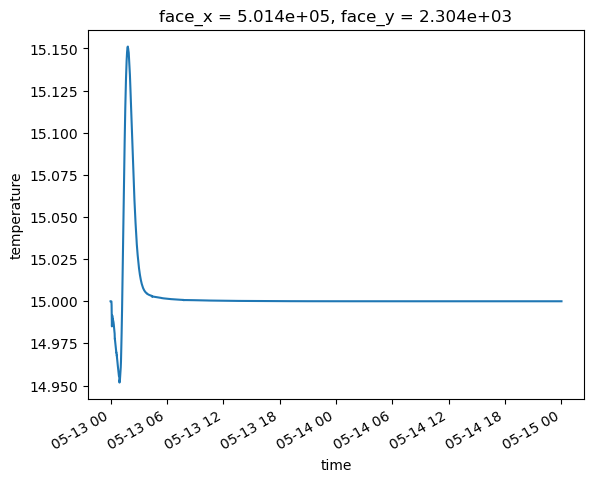

In [13]:
transport_model.mesh.temperature.isel(nface=217).plot()

In [28]:
transport_model.gdf

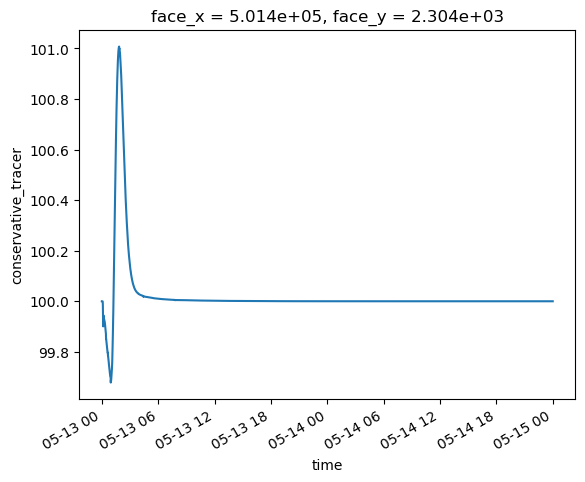

In [31]:
transport_model.mesh.conservative_tracer.isel(nface=217).plot()

## Compare Runtime of 1 Constituent

In [32]:
del transport_model

In [34]:
# point to config
config_filepath = "./demo_config_single.yml"

transport_model = cwr.ClearwaterRiverine(
    config_filepath=config_filepath,
    verbose=True,
)

Populating Model Mesh...
Calculating Required Parameters...


In [35]:
%%time
for t in range(len(transport_model.mesh.time) - 1):
    transport_model.update()

CPU times: total: 2min 23s
Wall time: 2min 23s


It takes 2 min, 23 seconds to run one constituent vs. 3 min 56 seconds to run two, so it doesn't have a NX slowdown per constiutent, but it's close. 